In [75]:
import sys
sys.path.append("/Volumes/pdoubraw-1/repos/ABLTools/python/")
sys.path.append("C:/Users/krydalch/Documents/Repos/ABLtools_python/")


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import stochasticTurbulenceTools as stt
import glob, os
import pandas as pd

sys.path.append("C:/Users/krydalch/Documents/Repos/")
from datatools import wfip2
from datatools.remote_sensing import scintec_profiler

In [77]:
plt.rc("font",size=14)

In [78]:
kir_ts = stt.stochasticTurbulence("TurbSim")

In [79]:
#kir_ts.readBTS("/Users/pdoubraw/Downloads/")
kir_ts.readBTS("C:/Users/krydalch/Desktop/TurbSim/bin/")

Opening file C:/Users/krydalch/Desktop/TurbSim/bin/TurbSim.bts...


## Load in sonic and sodar data

In [80]:
df_sonic = pd.read_csv('UTS_1820_1830.txt', sep='\t', header=None)

sodar_path = "/Volumes/pdoubraw-1/repos/jet/data/"
sodar_path = "C:\\Users\\krydalch\\Desktop\\MetMastData\\SODAR\\"

df = wfip2.read_dir(dpath=sodar_path, reader=scintec_profiler, ext='mnd')
df = df.set_index("datetime")
# Remove Faulty Data
df = df.replace("99.99",None)
df = df.replace("999.9",None)

df['wind speed'] = df['wind speed'].astype(float)

time_vs_height = df[["wind speed","height"]].reset_index().set_index(["datetime","height"]).unstack().astype("float")
time_vs_height.index = time_vs_height.index.tz_localize("UTC")
df_sdr = time_vs_height.copy()

In [81]:
df_sdr.head()

wind speed                                      \
height                         30.0  40.0  50.0  60.0  70.0  80.0  90.0    
datetime                                                                   
2017-02-17 00:00:00+00:00       5.26  6.46  7.25  7.55  7.98  8.46  8.82   
2017-02-17 00:10:00+00:00       5.89  6.72  7.45  7.87  8.27  8.28  8.55   
2017-02-17 00:20:00+00:00       6.22  7.16  8.07  8.40  8.74  8.95  9.09   
2017-02-17 00:30:00+00:00       6.58  7.46  8.05  8.79  9.16  9.37  9.59   
2017-02-17 00:40:00+00:00       6.53  7.54  8.43  8.99  9.11  9.38  9.46   

                                              ...                          \
height                    100.0 110.0  120.0  ... 230.0 240.0 250.0 260.0   
datetime                                      ...                           
2017-02-17 00:00:00+00:00  9.11  9.30   9.43  ...  8.40  8.40  8.40  8.40   
2017-02-17 00:10:00+00:00  8.55  8.68   8.50  ...  6.83  7.81  7.29  8.08   
2017-02-17 00:20:00+00:00  9.27  9.32   9.38  ...  9.22  8.70  8.73  9.07   
2017-02-17 00:30:00+00:00  9.72  9.82   9.97  ...  8.37  8.30  7.18  7.69   
2017-02-17 00:40:00+00:00  9.55  9.62  10.06  ...  9.54  9.54  9.54  9.54   

                                                                  
height                    270.0  280.0  290.0  300.0 310.0 320.0  
datetime                                                          
2017-02-17 00:00:00+00:00  8.40   8.40   8.40   8.40  8.40  8.40  
2017-02-17 00:10:00+00:00  8.90   8.90   8.90   8.90  8.90  8.90  
2017-02-17 00:20:00+00:00  9.72  10.40  10.29  10.29  9.40  9.79  
2017-02-17 00:30:00+00:00  7.69   7.69   7.69   7.69  7.69  7.69  
2017-02-17 00:40:00+00:00  9.54   9.54   9.54   9.54  9.54  9.54  

[5 rows x 30 columns]

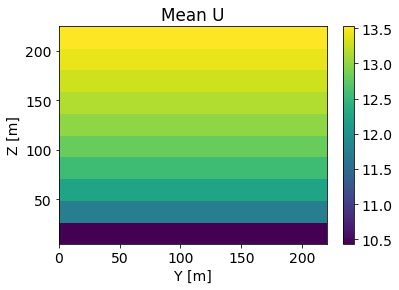

In [82]:
plt.pcolormesh(kir_ts.y, kir_ts.z, np.mean(kir_ts.u,axis=0).T)
plt.title("Mean U")
plt.xlabel("Y [m]")
plt.ylabel("Z [m]")
plt.colorbar()
#plt.savefig("../VP_2.png",bbox_inches="tight",dpi=500)

nope


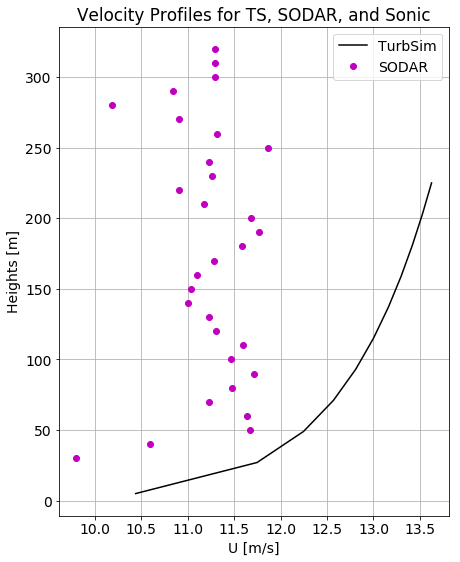

In [83]:
fig = plt.figure(figsize=(7,3*3))
half_ind_y = len(kir_ts.y)/2

u_TS = []
hs = []
u_sonic = []

#################### TS ##############################
i = 0
# Find avg U for each height TS
for z in kir_ts.z:
    #print(np.mean(kir_ts.u[:,int(half_ind_y),i]))
    u_TS = np.append(u_TS,np.mean(kir_ts.u[:,int(half_ind_y),i]))
    
    hs = np.append(hs, z)
    i = i + 1

# #################### SONIC ##############################
# us = range(1,7,3)
# heights = [16.8, 116.4]

# for u_h in us:
#     u_sonic= np.append(u_sonic,np.mean(df_sonic[u_h]))
    


#################### SODAR ##############################
resamp_size = '10min'#'1H'
resamp = df_sdr["wind speed"].resample(resamp_size).mean()
a = resamp.loc["2017-02-17 18:20:00"]



try:
    del u_sonic[200.0]

except:
    print("nope")
# ax = fig.add_subplot(3,1,1) 
# ax.plot(u_TS,kir_ts.z)


#plt.plot(u_sonic,heights,"g--",label = 'Sonic')
plt.plot(u_TS,hs,'k',label = 'TurbSim')
plt.plot(a.values,a.index,"mo",label = 'SODAR')

plt.title('Velocity Profiles for TS, SODAR, and Sonic')
plt.xlabel('U [m/s]')
plt.ylabel('Heights [m]')
#plt.style.use('seaborn-darkgrid')
plt.legend()
plt.grid(True)



#fig.savefig("../SODAR_LLJ_profiles1.png",bbox_inches="tight",dpi=500)

In [84]:
df_sonic.head()

,0,1,2,3,4,5,6
0,0.00,8.862427,-1.143493,-0.920420,9.283592,-0.617992,-1.331254
1,0.05,8.647600,-1.108700,-1.008280,9.230755,-0.556442,-1.508901
2,0.10,8.611907,-1.142198,-0.915209,9.083993,-0.668360,-1.458057
3,0.15,8.663696,-1.170032,-0.836512,9.147439,-0.604986,-1.433391
4,0.20,8.579518,-1.171691,-0.848768,9.083448,-1.047690,-1.512704


In [85]:
ti

NameError: name 'ti' is not defined

Text(0, 0.5, 'Z [m]')

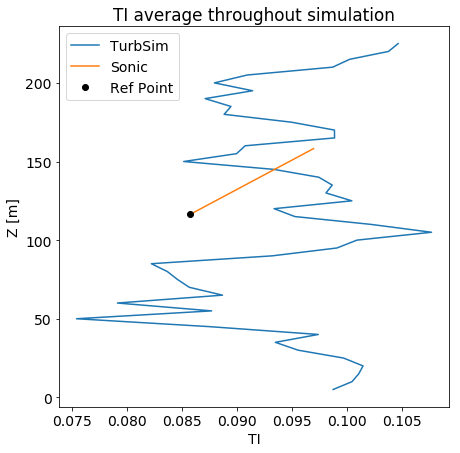

In [37]:

u ={}
v = {}
w = {}

ti =[]

#kir_ts
us = range(1,7,3)
heights = [116.4,158.2]
time = df_sonic.loc[:,0]
i = 0
for u_h in us:
    u[heights[i]] = df_sonic[u_h]
    v[heights[i]] = df_sonic[u_h+1]
    w[heights[i]] = df_sonic[u_h+2]
    
    uu = np.sqrt((df_sonic[u_h] - df_sonic[u_h].mean())**2)
    
    ti_s = (uu/ df_sonic[u_h].mean()).mean()

    ti = np.append(ti,ti_s)
    i = i +1

TI_turb = kir_ts.TI()
Ti_hub = TI_turb[kir_ts.jHub, :]

fig = plt.figure(figsize=(7,7))

plt.plot(Ti_hub,kir_ts.z,label = 'TurbSim')
plt.plot(ti,heights,label= 'Sonic')
plt.plot(ti[-2],heights[-2],'ko',label='Ref Point')
plt.legend()
plt.title("TI average throughout simulation")
plt.xlabel("TI")
plt.ylabel("Z [m]")

Text(0, 0.5, 'Z [m]')

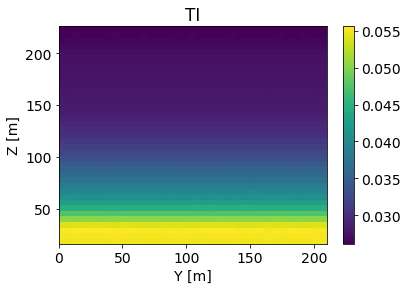

In [62]:
plt.pcolormesh(kir_ts.y, kir_ts.z, kir_ts.TI().T)
plt.colorbar()
plt.title("TI")
plt.xlabel("Y [m]")
plt.ylabel("Z [m]")

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

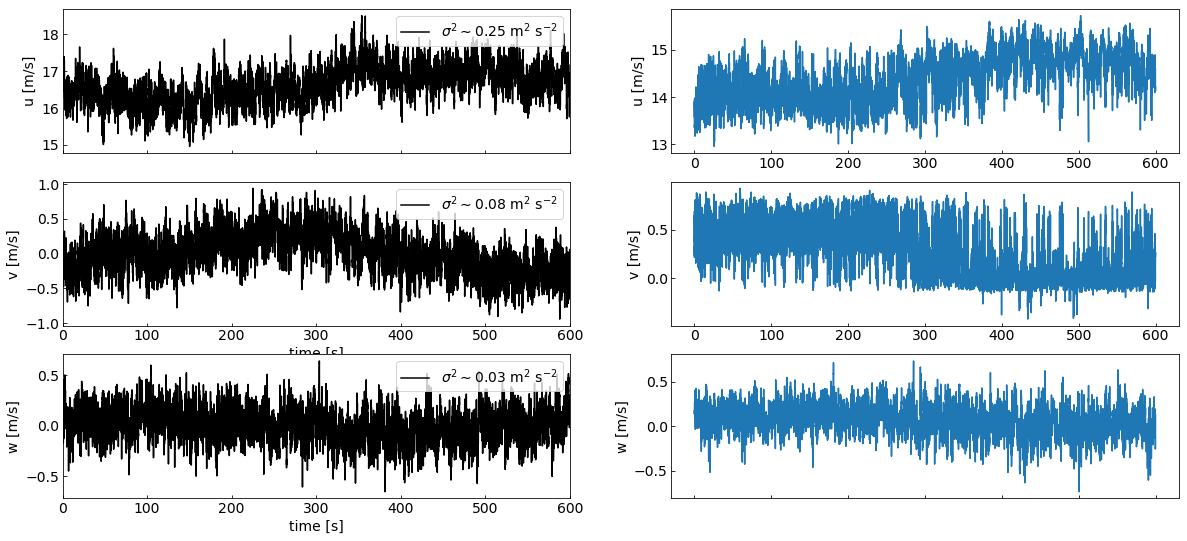

In [63]:
ref_z_ind = 10
ref_y_ind =len(kir_ts.y)/2 



u ={}
v = {}
w = {}
#kir_ts
us = range(1,7,3)
heights = [ 16.8,  116.4]
time = df_sonic.loc[:,0]
i = 0
for u_h in us:
    u[heights[i]] = df_sonic[u_h]
    v[heights[i]] = df_sonic[u_h+1]
    w[heights[i]] = df_sonic[u_h+2]
    i = i +1



times = np.arange(0,kir_ts.nSeconds,kir_ts.dT)

fig = plt.figure(figsize=(20,3*3))
ax  = {}


# for iax,component in enumerate(['u','v','w']):
########  U ###############
component = 'u'
iax = 1
vel_component = getattr(kir_ts,component)

ax = fig.add_subplot(3,2,iax)    
ax.plot(times, vel_component[:,kir_ts.jHub, kir_ts.kHub], 
             '-k', label="$\sigma^2\sim{0:.2f}$ m$^2$ s$^{{-2}}$".format(np.var(vel_component[:,kir_ts.jHub, kir_ts.kHub ])))
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')   
ax.set_ylabel("{0} [m/s]".format(component))
if iax<2:
    plt.setp(ax.get_xticklabels(), visible=False)
else:
    ax.set_xlabel("time [s]")
ax.set_xlim([0,kir_ts.nSeconds])
plt.legend(loc=1)
    
    # Sonic STUFF
ax = fig.add_subplot(3,2,iax+1)      
ax.plot(time,u[116.4])
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')   
ax.set_ylabel("{0} [m/s]".format(component))

########  V ###############
component = 'v'
iax = 3
vel_component = getattr(kir_ts,component)

ax = fig.add_subplot(3,2,iax)    
ax.plot(times, vel_component[:,kir_ts.jHub, kir_ts.kHub], 
             '-k', label="$\sigma^2\sim{0:.2f}$ m$^2$ s$^{{-2}}$".format(np.var(vel_component[:,kir_ts.jHub, kir_ts.kHub])))
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')   
ax.set_ylabel("{0} [m/s]".format(component))

ax.set_xlabel("time [s]")
ax.set_xlim([0,kir_ts.nSeconds])
plt.legend(loc=1)
# SONIC STUFF
ax = fig.add_subplot(3,2,iax+1)      
ax.plot(time,v[116.4]) 
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')   
ax.set_ylabel("{0} [m/s]".format(component))


########  W ###############
component = 'w'
iax = 5
vel_component = getattr(kir_ts,component)

ax = fig.add_subplot(3,2,iax)    
ax.plot(times, vel_component[:,kir_ts.jHub, kir_ts.kHub], 
             '-k', label="$\sigma^2\sim{0:.2f}$ m$^2$ s$^{{-2}}$".format(np.var(vel_component[:,kir_ts.jHub, kir_ts.kHub ])))
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')   
ax.set_ylabel("{0} [m/s]".format(component))
if iax<2:
    plt.setp(ax.get_xticklabels(), visible=False)
else:
    ax.set_xlabel("time [s]")
ax.set_xlim([0,kir_ts.nSeconds])
plt.legend(loc=1)
# SONIC STUFF
ax = fig.add_subplot(3,2,iax+1)      
ax.plot(time,w[116.4])  
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')   
ax.set_ylabel("{0} [m/s]".format(component))
plt.setp(ax.get_xticklabels(), visible=False )

In [ ]:
kir_ts.jHub
kir_ts.y[20]
kir_ts.kHub
kir_ts.z[19]

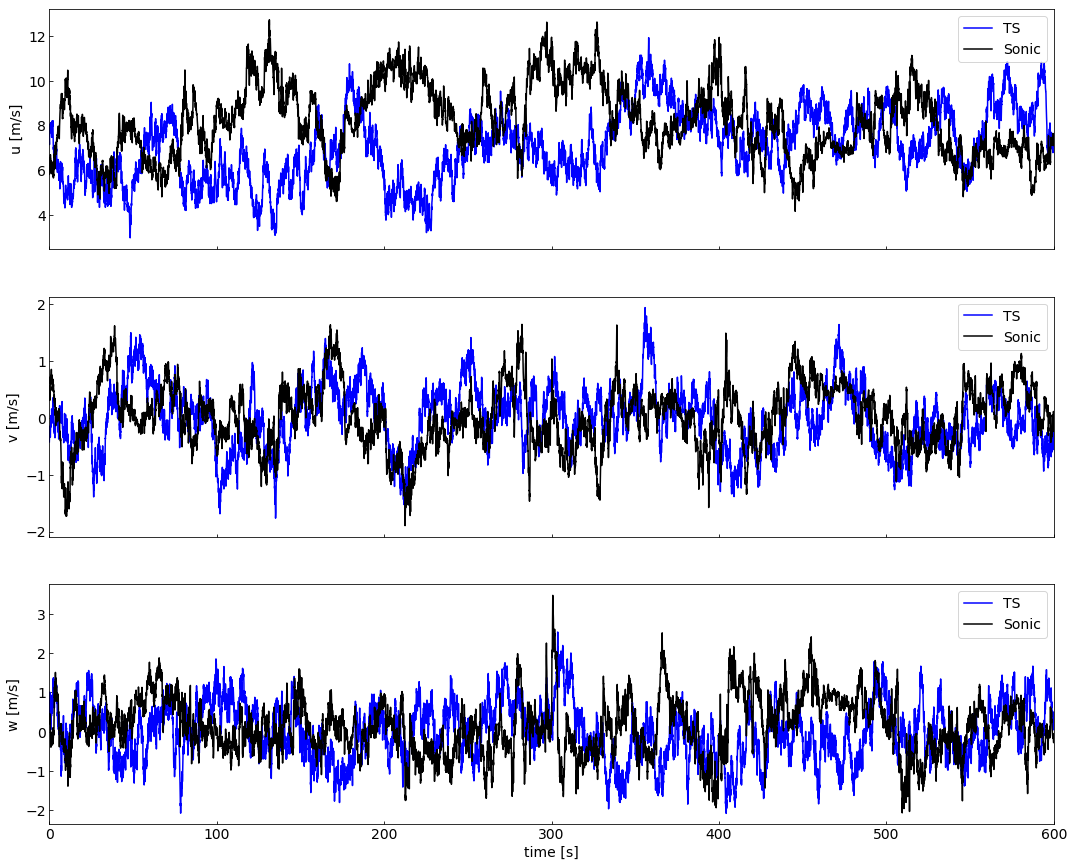

In [22]:

height_sonic = 116.4



u ={}
v = {}
w = {}
#kir_ts
us = range(1,7,3)
heights = [16.8,  116.4]
time = df_sonic.loc[:,0]
i = 0
for u_h in us:
    u[heights[i]] = df_sonic[u_h]
    v[heights[i]] = df_sonic[u_h+1]
    w[heights[i]] = df_sonic[u_h+2]
    i = i +1



times = np.arange(0,kir_ts.nSeconds,kir_ts.dT)

fig = plt.figure(figsize=(18,15))
ax  = {}


# for iax,component in enumerate(['u','v','w']):
########  U ###############
component = 'u'
iax = 1
vel_component = getattr(kir_ts,component)

ax = fig.add_subplot(3,1,iax)    
ax.plot(times, vel_component[:,kir_ts.jHub, kir_ts.kHub], 
             '-b', label='TS')
ax.plot(time,u[height_sonic], 
             '-k', label='Sonic')
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')   
ax.set_ylabel("{0} [m/s]".format(component))
if iax<2:
    plt.setp(ax.get_xticklabels(), visible=False)
else:
    ax.set_xlabel("time [s]")
ax.set_xlim([0,kir_ts.nSeconds])
plt.legend(loc=1)

########  V ###############
component = 'v'
iax = 2
vel_component = getattr(kir_ts,component)

ax = fig.add_subplot(3,1,iax)    
ax.plot(times, vel_component[:,kir_ts.jHub, kir_ts.kHub], 
             '-b', label='TS')
ax.plot(time,v[height_sonic], 
             '-k', label='Sonic')
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')   
ax.set_ylabel("{0} [m/s]".format(component))
if iax<=2:
    plt.setp(ax.get_xticklabels(), visible=False)
else:
    ax.set_xlabel("time [s]")
ax.set_xlim([0,kir_ts.nSeconds])
plt.legend(loc=1)


########  W ###############
component = 'w'
iax = 3
vel_component = getattr(kir_ts,component)

ax = fig.add_subplot(3,1,iax)    
ax.plot(times, vel_component[:,kir_ts.jHub, kir_ts.kHub], 
             '-b', label='TS')
ax.plot(time,w[height_sonic], 
             '-k', label='Sonic')
ax.xaxis.set_tick_params(direction='in')
ax.yaxis.set_tick_params(direction='in')   
ax.set_ylabel("{0} [m/s]".format(component))
if iax<2:
    plt.setp(ax.get_xticklabels(), visible=False)
else:
    ax.set_xlabel("time [s]")
ax.set_xlim([0,kir_ts.nSeconds])
plt.legend(loc=1)
